In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sdrkit import comm_utils as cu
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D



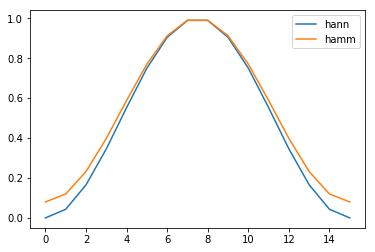

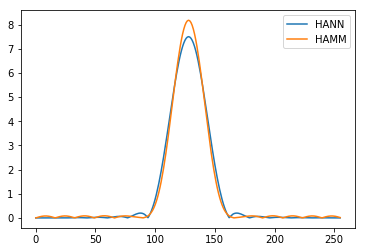

In [2]:
w_hann = np.hanning(16)
w_hamm = np.hamming(16)

plt.figure()
plt.plot(w_hann, label="hann")
plt.plot(w_hamm, label="hamm")
plt.legend()
plt.show()


HANN = abs(np.fft.fftshift(np.fft.fft(w_hann,256)))
HAMM = abs(np.fft.fftshift(np.fft.fft(w_hamm,256)))
plt.figure()
plt.plot(HANN, label="HANN")
plt.plot(HAMM, label="HAMM")
plt.legend()
plt.show()


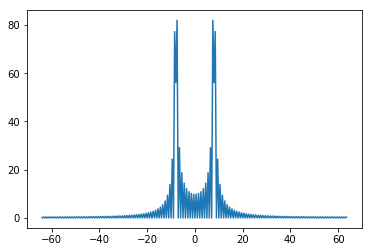

In [28]:
b = np.random.randint(0,2,1024)
#x = cu.psk_mod(b,2)
x = cu.qam_mod(b,6)
fs = 128

x_upsampled=x.repeat(fs)

#x_upsampled=np.zeros(len(x)*fs, dtype='complex')
#x_upsampled[0::fs]=x

N = len(x_upsampled)
n = np.arange(N)
fc = 8
carrier = np.exp(2*np.pi*1j*fc*n/fs)
#plt.plot(np.real(carrier[:20]))
#plt.show()

xc = x_upsampled*carrier
xc = np.real(xc)+np.imag(xc)

frame_length = 256
number_of_frames = len(xc)//frame_length
#X = np.fft.fft(x_upsampled)
XC = np.fft.fftshift(np.fft.fft(xc.reshape(number_of_frames,frame_length)))

#f = np.arange(0,fs,fs/frame_length)
f = np.arange(-0.5*fs,0.5*fs,fs/frame_length)
#plt.plot(f,abs(X))
plt.plot(f,abs(XC[0,:]))
plt.show()

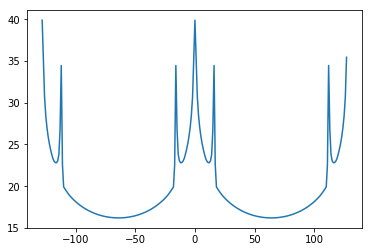

In [29]:
l_vals = np.arange(-frame_length//2,frame_length//2)
#scf = np.zeros(len(l_vals),dtype='complex')
scf = np.zeros((len(l_vals),frame_length),dtype='complex')
idx=0
for l in l_vals:
    XC_lag = np.roll(XC,-l,axis=1)
    XC_lead = np.roll(XC,l,axis=1)
    #scf[idx] = sum(XC_lag * np.conj(XC_lead))/number_of_frames
    scf[idx,:] = sum(XC_lag * np.conj(XC_lead))/number_of_frames
    idx = idx + 1
    #plt.figure()
    #plt.plot(np.log10(abs(XC_lag * np.conj(XC_lead))))
    #plt.show()
    #print(sum(abs(np.roll(XC,-l) * np.conj(np.roll(XC,l))))/N)

plt.plot(l_vals,10*np.log10(np.max(np.abs(scf),axis=1)))
         
plt.show()


In [5]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#x = np.arange(scf.shape[0])
#y = np.arange(scf.shape[1])
#X, Y = np.meshgrid(x,y)
#ax.plot_surface(X,Y,abs(scf))
#plt.show()
